In [23]:
%%capture
%run shared.ipynb

In [24]:
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
plt.rc('axes', titlesize=18) 
plt.rc('figure', figsize=(15,12))
matplotlib.rcParams['figure.dpi'] = 100

In [25]:
bibliotekarer = df[df.survey =="Bibliotekarer"]
len(bibliotekarer)

161

In [26]:
sum(bibliotekarer.Undervisning_om_skeive.isin(["Y", "N"])) - sum(bibliotekarer.Undervisning_om_skeive=="N")

7

In [27]:
yes_KH_self = bibliotekarer.Individ_behov_KH>=5
yes_KH_others = bibliotekarer.Overall_behov_KH>=5
sum(yes_KH_self)/len(bibliotekarer)
#sum(yes_KH_others)/len(bibliotekarer)

0.43478260869565216

In [28]:
allbibfaglig = bibliotekarer.Undervisning_om_skeive.isin(["Y", "N"])
print("allbibfaglig =", sum(allbibfaglig))
allno = bibliotekarer.Undervisning_om_skeive=="N"
allyes = bibliotekarer.Undervisning_om_skeive=="Y"
sum(allyes)/sum(allbibfaglig)


allbibfaglig = 131


0.05343511450381679

In [29]:
print(np.mean(bibliotekarer.Interesse_KH), np.std(bibliotekarer.Interesse_KH))

4.9813664596273295 1.55827604093261


In [30]:
brunnermunzel_test(bibliotekarer.Overall_behov_KH.dropna(), bibliotekarer.Individ_behov_KH.dropna())

Brunner-Munzel teststatistikk:-4.378 
p-verdi:1.631548760694379e-05 
CL effektstørrelse = G1: 0.632 / G2: 0.368  
95% konfidensintervall: ±0.06 (lav = 0.309, høy = 0.428) 
frihetsgrad:315.75210808628003 


In [31]:
print(np.mean(alle_skeive.Behov_kompetanseheving.dropna()), np.std(cs_brukere.Behov_kompetanseheving.dropna()))

5.235584843492586 1.322575684030863


In [32]:
np.mean(alle_skeive.Behov_kompetanseheving), np.mean(cis.Behov_kompetanseheving), np.mean(tnb.Behov_kompetanseheving)

(5.235584843492586, 5.1020408163265305, 5.6706586826347305)

In [33]:
stats.pearsonr(bibliotekarer.Individ_behov_KH.dropna(), bibliotekarer.Interesse_KH)

(0.43051642604143087, 1.1963501476594415e-08)

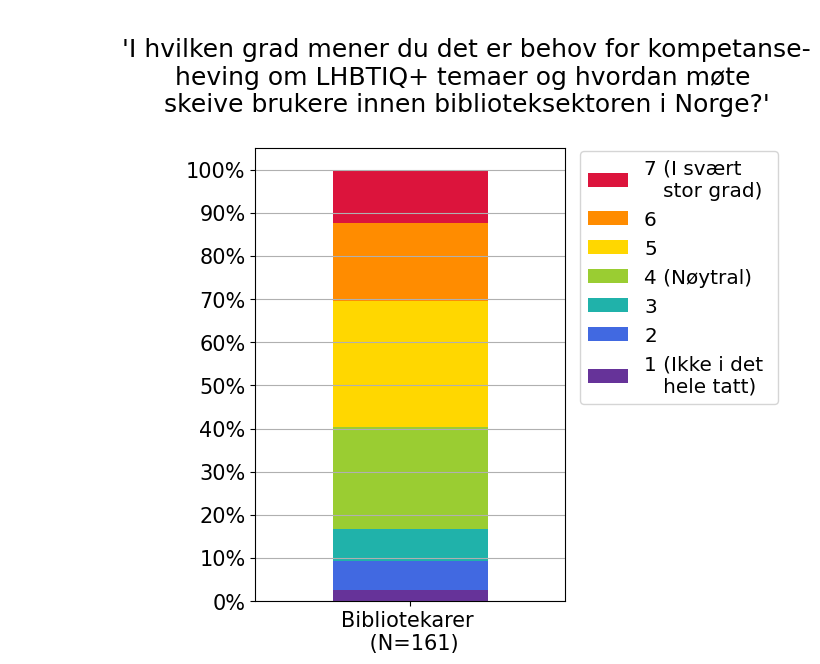

In [34]:
#stacked histogram with groups & column name

with plt.rc_context({'figure.figsize': (4,6), 'figure.dpi': 100}):
    plot_group_column(bib_compare, "Overall_behov_KH", low_is_bad=False, plot_all=False, title="\n              'I hvilken grad mener du det er behov for kompetanse-\n              heving om LHBTIQ+ temaer og hvordan møte \n              skeive brukere innen biblioteksektoren i Norge?'\n")
    

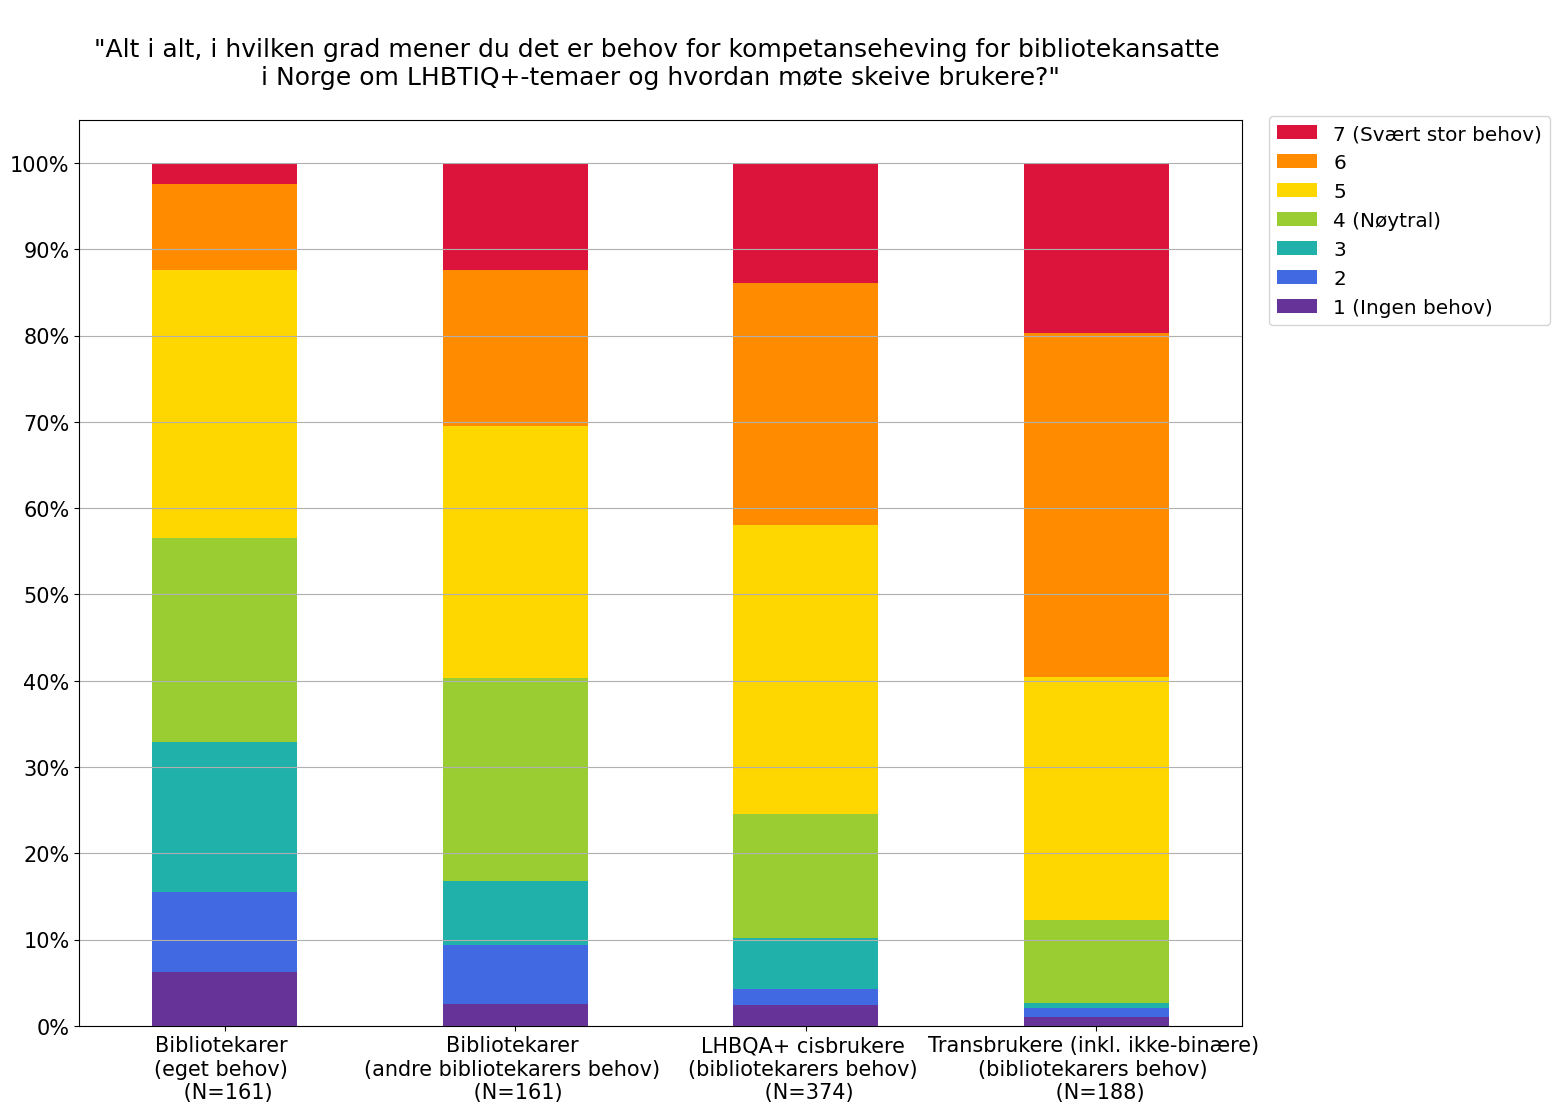

In [35]:
plot_group_column(KH_compare_grouped, "KH_comparison", 
                  plot_all=False, 
                  low_is_bad=False, 
                  group_order=list(KH_compare), 
                  title='\n"Alt i alt, i hvilken grad mener du det er behov for kompetanseheving for bibliotekansatte \ni Norge om LHBTIQ+-temaer og hvordan møte skeive brukere?"\n', 
                  labels=["1 (Ingen behov)", "2", "3", "4 (Nøytral)", "5", "6", "7 (Svært stor behov)"])
plt.savefig("Fig 3.pdf", bbox_inches="tight")



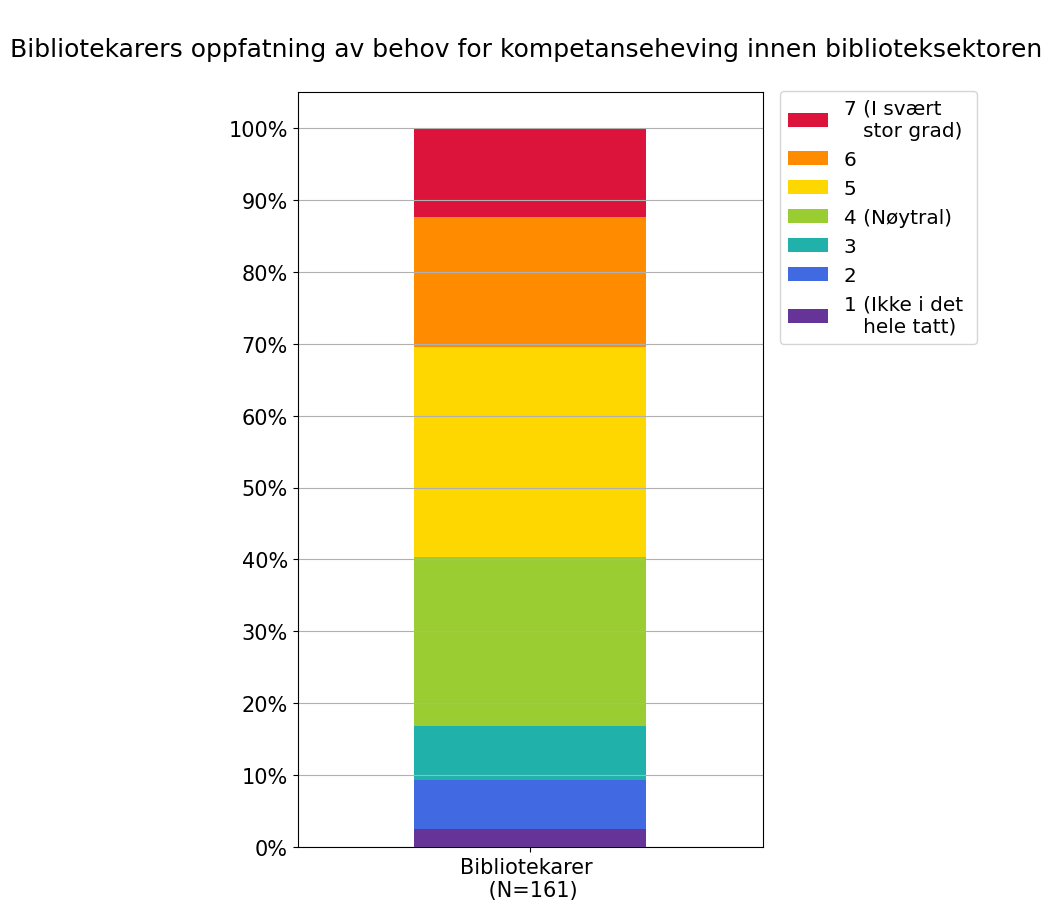

In [36]:
with plt.rc_context({'figure.figsize': (6,10)}):
    plot_group_column(bib_compare2, "Overall_behov_KH", plot_all=False, title='\nBibliotekarers oppfatning av behov for kompetanseheving innen biblioteksektoren \n', low_is_bad=False)

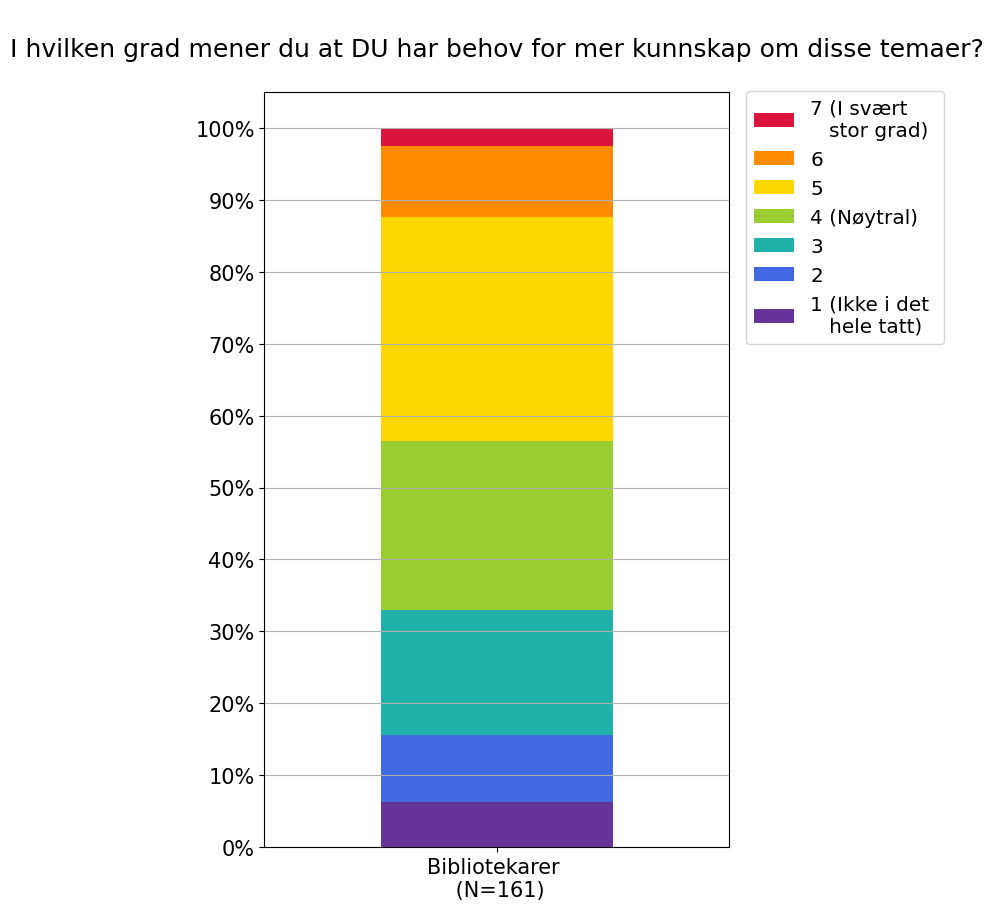

In [37]:
with plt.rc_context({'figure.figsize': (6,10)}):
    plot_group_column(bib_compare2, "Individ_behov_KH", low_is_bad=False, title="\nI hvilken grad mener du at DU har behov for mer kunnskap om disse temaer?\n")

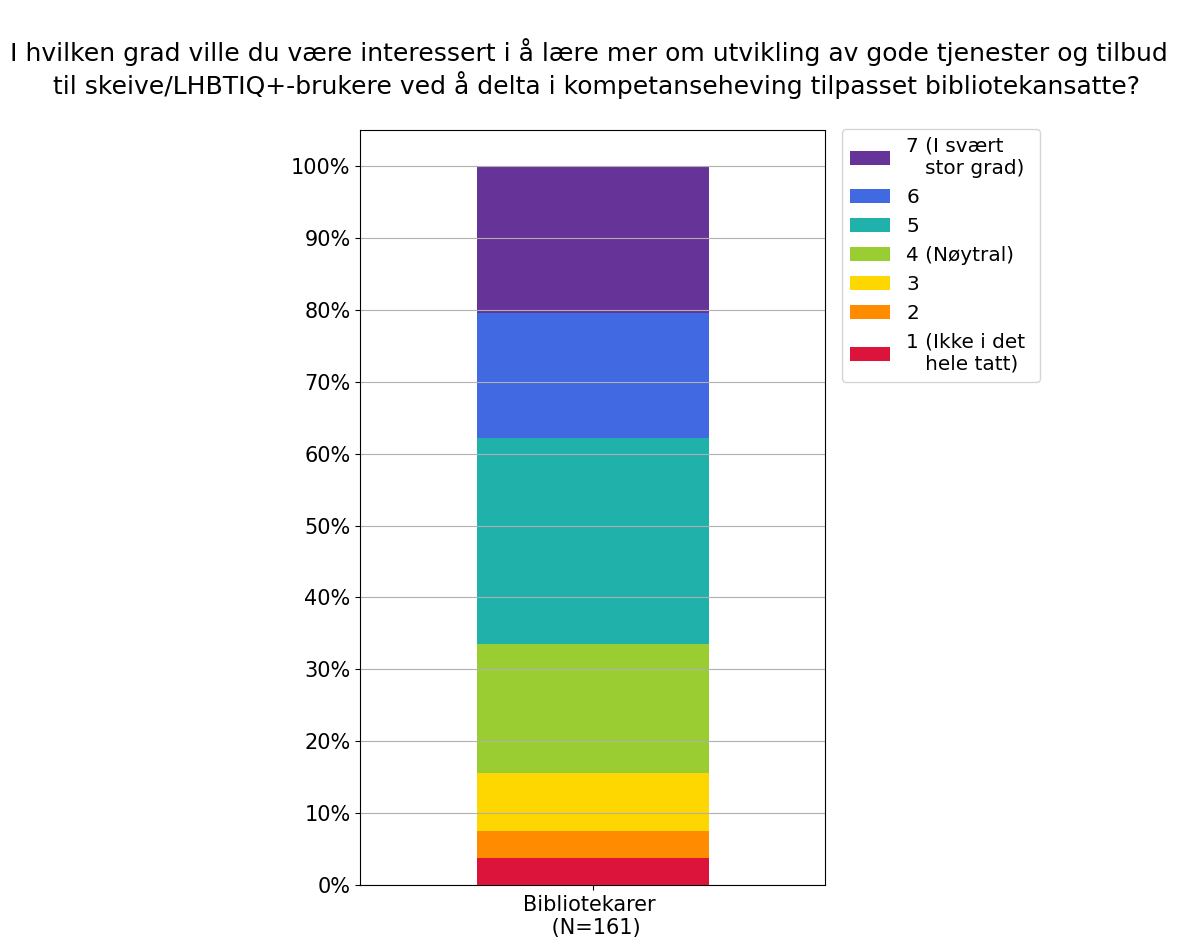

In [38]:
with plt.rc_context({'figure.figsize': (6,10)}):
    plot_group_column(bib_compare2, "Interesse_KH", title="\nI hvilken grad ville du være interessert i å lære mer om utvikling av gode tjenester og tilbud \n til skeive/LHBTIQ+-brukere ved å delta i kompetanseheving tilpasset bibliotekansatte?\n")

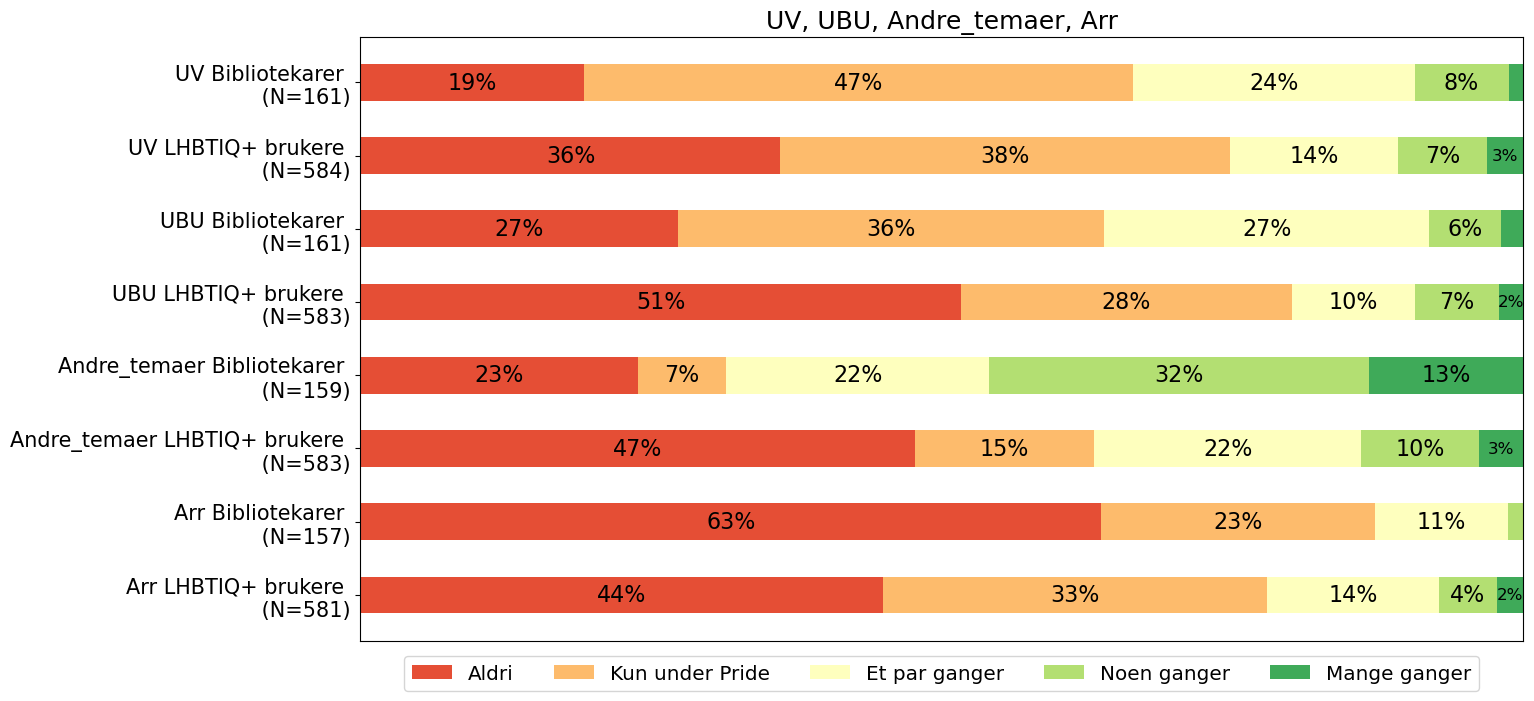

In [39]:
enighet(bib_compare_df, ["UV", "UBU", "Andre_temaer", "Arr"])
plt.savefig("Fig3.pdf", bbox_inches="tight")

In [40]:
print("Mann:", len(s_men), "(inkl.",(len(cis_men)), "cismenn og", len(trans_men), "transmenn)")
print("Kvinne:", len(s_women), "(inkl.",(len(cis_women)), "ciskvinner og", len(trans_women), "transkvinner)")
print("Nonbinary:", len(nonbinary))
print("Søkende / usikker:", len(questioning))
print("Ingen av disse kategoriene passer — jeg har en annen kjønnsidentitet:", len(none))

Mann: 148 (inkl. 101 cismenn og 45 transmenn)
Kvinne: 350 (inkl. 306 ciskvinner og 35 transkvinner)
Nonbinary: 108
Søkende / usikker: 68
Ingen av disse kategoriene passer — jeg har en annen kjønnsidentitet: 14


In [41]:
print(none.KID_egne_ord.unique())

['Kvann' 'Transmann' 'Kjønnsskeiv' 'Ambigender' 'Intetkjønn' 'A gender'
 'Flytende' 'Agender' 'Transe'
 'Biologisk kvinne, kjønnsidentitet flytende' 'Butch (kvinne)'
 'Jeg liker ikke kjønnsnormer, i teorien er jeg ciskvinne, men liker ikke å identifisere meg som kvinne pga. kjønnsrollene det deler meg inn i. Av og til er jeg feminin, av og til maskulin, mest bare meg.'
 'Identifiserer ikke med kjønn i det hele tatt. Jeg har biologisk kjønn, men kjønn er ikke relevant utenom biologi for meg'
 nan]


Make synlig skeiv & Skeiv ID dfs, bar chart of how many unique SOs & ROs people chose, by gender or by skeiv ID?

In [42]:
TRUE = alle_skeive[alle_skeive.Tokjønnsnorm==True]
FALSE = alle_skeive[alle_skeive.Tokjønnsnorm==False]
print(stats.spearmanr(alle_skeive.m_med_respekt.fillna(0), alle_skeive.Minoritetsstress_ansatte.fillna(0)), stats.spearmanr(cis_heterofile.m_med_respekt.fillna(0), cis_heterofile.Minoritetsstress_ansatte.fillna(0)))
print (len(alle_skeive), len(cis_heterofile)) 


SpearmanrResult(correlation=-0.396888843715246, pvalue=1.1896335267363712e-25) SpearmanrResult(correlation=-0.5247156001193032, pvalue=2.7206368678342067e-20)
642 267


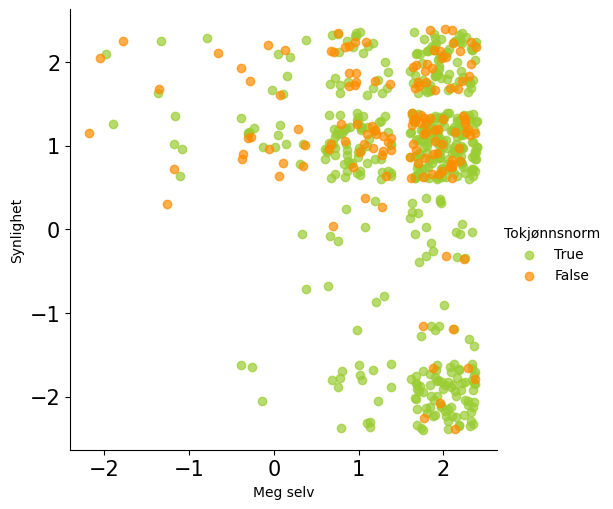

In [43]:
import seaborn
g = seaborn.lmplot(x="m_med_respekt", y="Synlighet", hue="Tokjønnsnorm", data=alle_skeive, x_jitter=.4, y_jitter=.4, palette=( "YellowGreen", "DarkOrange", "Gold",  "YellowGreen", "DarkOrange"), hue_order = [True, False], fit_reg=False, scatter_kws = dict(alpha=.7))
g = (g.set_axis_labels("Meg selv", "Synlighet"))


In [44]:
brunnermunzel_test(TRUE.Helt_meg_selv.dropna(), FALSE.Helt_meg_selv.dropna())

Brunner-Munzel teststatistikk:-5.521 
p-verdi:1.033396461735947e-07 
CL effektstørrelse = G1: 0.648 / G2: 0.352  
95% konfidensintervall: ±0.053 (lav = 0.299, høy = 0.405) 
frihetsgrad:200.9651235094023 
